<a href="https://colab.research.google.com/github/RyanPiao/-WebLaTex/blob/main/Lab3%20/%20Lab3_Benchmarking_Development_with_WBGAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
!pip install wbgapi

In [37]:
import wbgapi as wb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Economies: GTM (Guatemala), UMC (Upper Middle Income), WLD (World)
country_codes = ['GTM', 'UMC', 'WLD']

indicators = {
    'NY.GDP.PCAP.KD': 'GDP_Per_Capita_Const',     # Standard of Living
    'SL.TLF.CACT.ZS': 'Labor_Part_Rate',          # Labor Supply
    'SL.UEM.TOTL.ZS': 'Unemployment_Rate',        # Labor Friction
    'SL.TLF.TOTL.IN': 'Labor_Force_Total',        # Total Workers
    'NY.GDP.MKTP.KD': 'GDP_Const',                # Economic Size
    'FP.CPI.TOTL.ZG': 'Inflation_CPI',            # Stability
    'NY.GDS.TOTL.ZS': 'Gross_Dom_Savings',        # Savings
    'NE.GDI.TOTL.ZS': 'Gross_Cap_Formation',      # Investment
    'NE.EXP.GNFS.ZS': 'Exports_GDP',              # Exports
    'NE.IMP.GNFS.ZS': 'Imports_GDP',              # Imports
    'GC.TAX.TOTL.GD.ZS': 'Tax_Rev_GDP',           # Gov Revenue
    'NE.CON.GOVT.ZS': 'Gov_Exp_GDP'               # Gov Spending
}

In [38]:
# 1. Fetch Data
print("Fetching data...")
df_raw = wb.data.DataFrame(indicators, economy=country_codes, time=range(2000, 2025))

# 2. Transpose (Flip Rows/Cols)
df = df_raw.T

# 3. Clean Index
df.index = df.index.str.replace('YR', '').astype(int)
df.index.name = 'Year'
df = df.sort_index()

# 4. Rename Columns
df.rename(columns=indicators, level=1, inplace=True)

# 5. Extract Guatemala for specific calculations
df_gtm = df.xs('GTM', axis=1, level=0).copy()

Fetching data...


In [39]:
# 1. Natural Rate of Unemployment (5-Year MA)
df_gtm['Natural_Rate_Unemp'] = df_gtm['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
df_gtm['Productivity'] = df_gtm['GDP_Const'] / df_gtm['Labor_Force_Total']

# 3. Net Capital Outflow (Exports - Imports)
df_gtm['NCO'] = df_gtm['Exports_GDP'] - df_gtm['Imports_GDP']

# 4. Budget Balance (Tax - Spending)
df_gtm['Budget_Balance'] = df_gtm['Tax_Rev_GDP'] - df_gtm['Gov_Exp_GDP']

In [40]:
# --- CALCULATIONS FOR GUATEMALA ---

# 1. Natural Rate of Unemployment (5-Year Moving Average)
# Smoothing out business cycles to find structural unemployment
df_gtm['Natural_Rate_Unemp'] = df_gtm['Unemployment_Rate'].rolling(window=5).mean()

# 2. Productivity (Output per Worker)
# Formula: Real GDP / Total Labor Force
df_gtm['Productivity'] = df_gtm['GDP_Const'] / df_gtm['Labor_Force_Total']

# 3. Net Capital Outflow (NCO)
# Formula: Exports - Imports
df_gtm['NCO'] = df_gtm['Exports_GDP'] - df_gtm['Imports_GDP']

# 4. Government Budget Balance
# Formula: Tax Revenue - Gov Expenditure
df_gtm['Budget_Balance'] = df_gtm['Tax_Rev_GDP'] - df_gtm['Gov_Exp_GDP']

print("Calculations Complete.")

Calculations Complete.


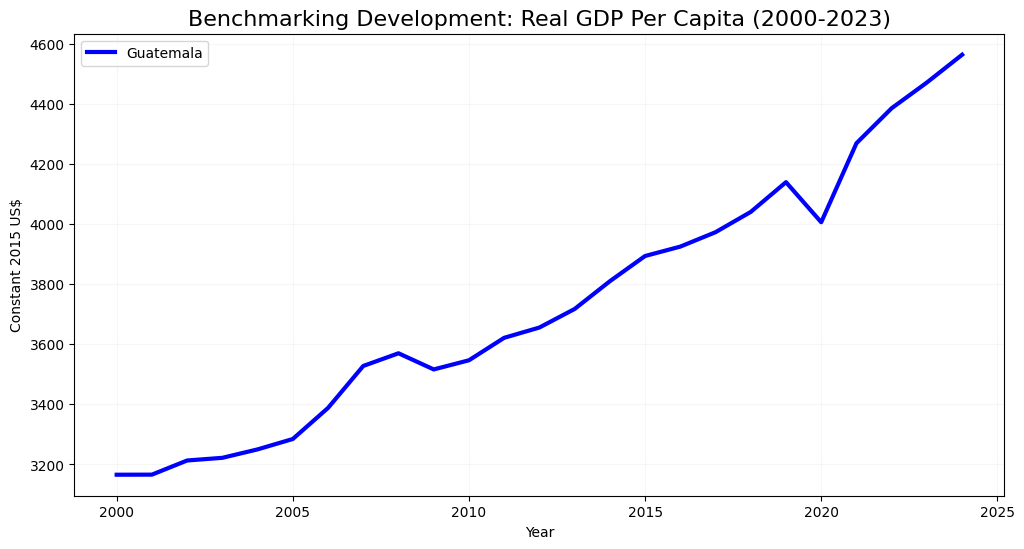

In [41]:
plt.figure(figsize=(12, 6))
# Plot ONLY Guatemala
plt.plot(df.index, df[('GTM', 'GDP_Per_Capita_Const')], label='Guatemala', color='blue', linewidth=3)
plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.ylabel('Constant 2015 US$')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.1)
plt.show()

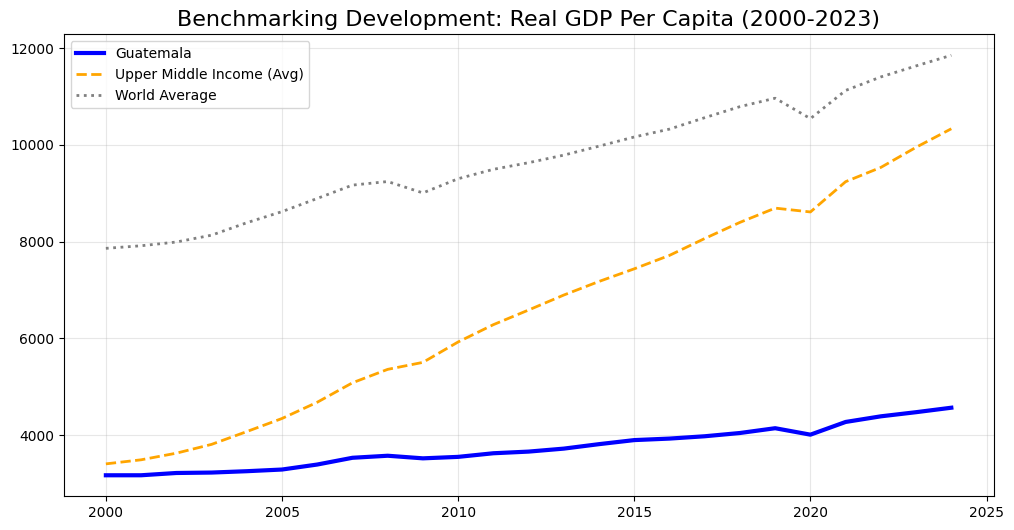

In [42]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[('GTM', 'GDP_Per_Capita_Const')], label='Guatemala', color='blue', linewidth=3)
# ADD THESE LINES
plt.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], label='Upper Middle Income (Avg)', color='orange', linestyle='--', linewidth=2)
plt.plot(df.index, df[('WLD', 'GDP_Per_Capita_Const')], label='World Average', color='grey', linestyle=':', linewidth=2)

plt.title('Benchmarking Development: Real GDP Per Capita (2000-2023)', fontsize=16)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

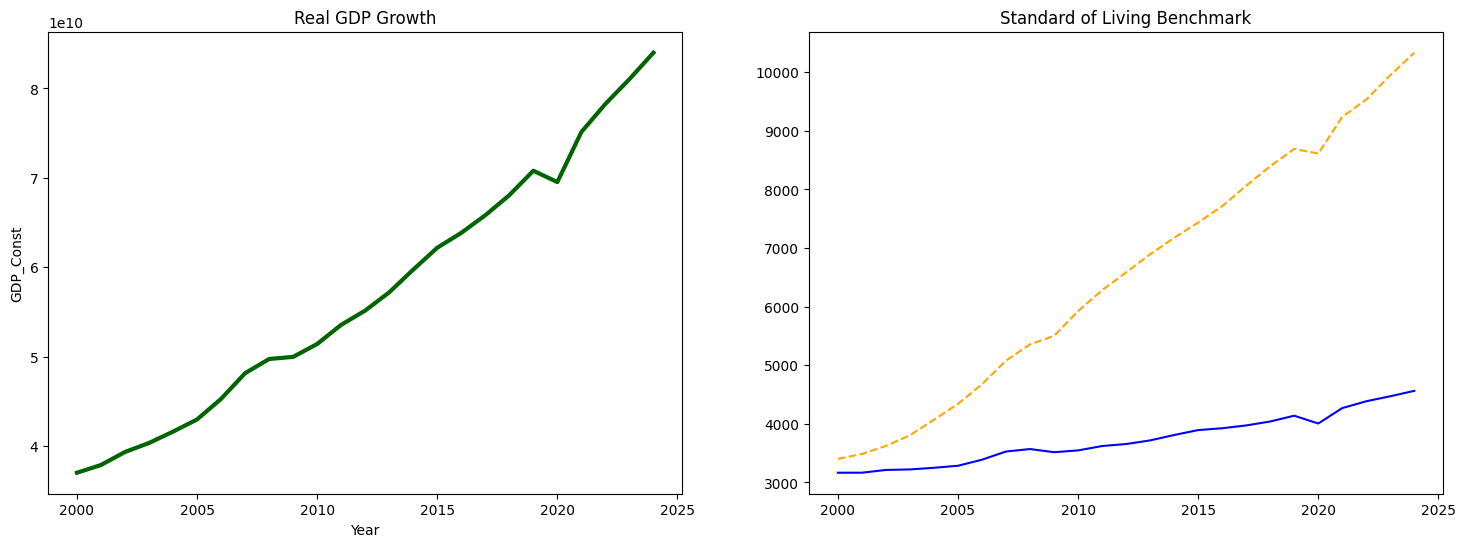

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Chart A: Total GDP
sns.lineplot(data=df_gtm, x=df_gtm.index, y='GDP_Const', color='darkgreen', linewidth=3, ax=ax1)
ax1.set_title('Real GDP Growth')

# Chart B: GDP Per Capita Benchmark
ax2.plot(df.index, df[('GTM', 'GDP_Per_Capita_Const')], color='blue')
ax2.plot(df.index, df[('UMC', 'GDP_Per_Capita_Const')], color='orange', linestyle='--')
ax2.set_title('Standard of Living Benchmark')
plt.show()

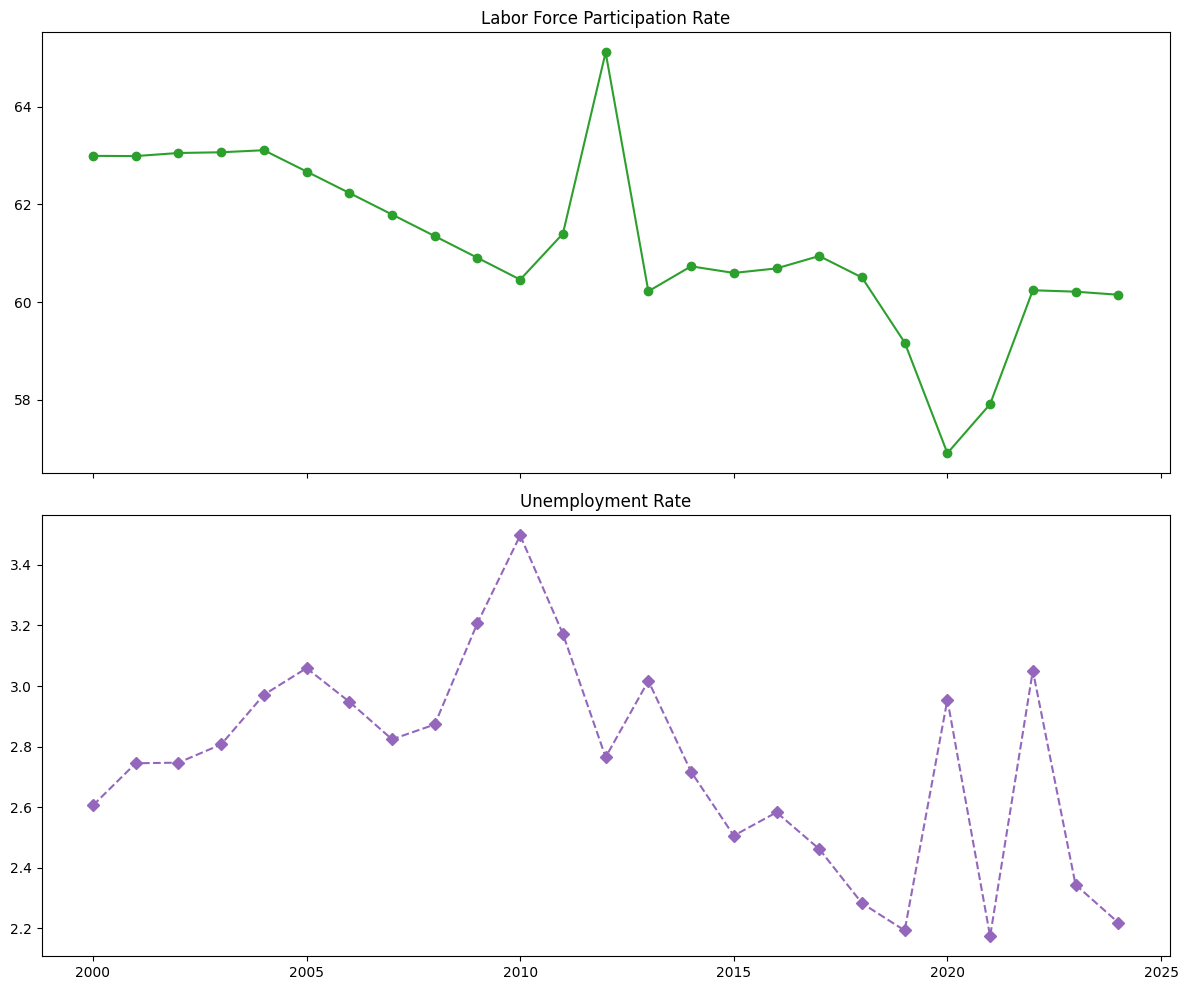

In [44]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Top: Participation
ax1.plot(df_gtm.index, df_gtm['Labor_Part_Rate'], color='tab:green', marker='o')
ax1.set_title('Labor Force Participation Rate')

# Bottom: Unemployment
ax2.plot(df_gtm.index, df_gtm['Unemployment_Rate'], color='tab:purple', marker='D', linestyle='--')
ax2.set_title('Unemployment Rate')
plt.tight_layout()
plt.show()

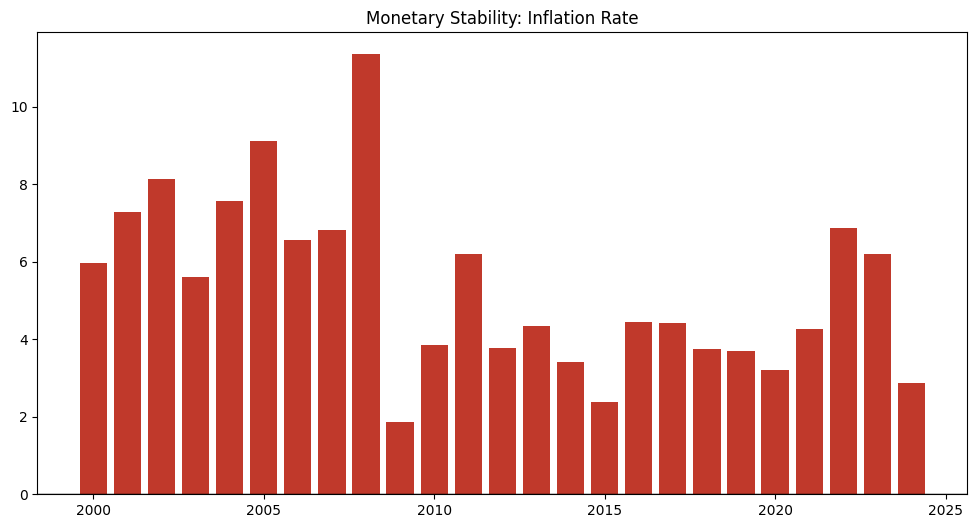

In [45]:
plt.figure(figsize=(12, 6))

plt.bar(df_gtm.index, df_gtm['Inflation_CPI'], color='#c0392b')

plt.axhline(0, color='black', linewidth=1)
plt.title('Monetary Stability: Inflation Rate')
plt.show()

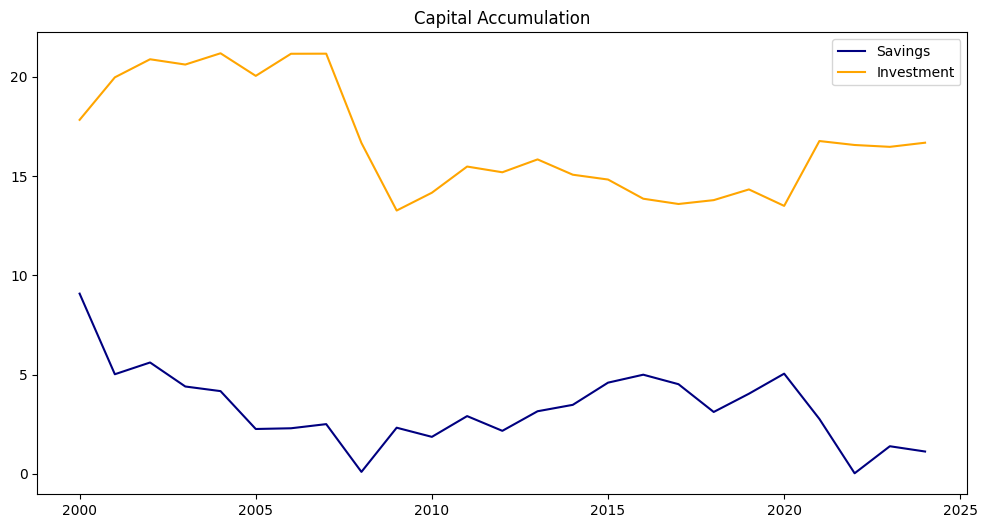

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(df_gtm.index, df_gtm['Gross_Dom_Savings'], label='Savings', color='navy')
plt.plot(df_gtm.index, df_gtm['Gross_Cap_Formation'], label='Investment', color='orange')
plt.title('Capital Accumulation')
plt.legend()
plt.show()

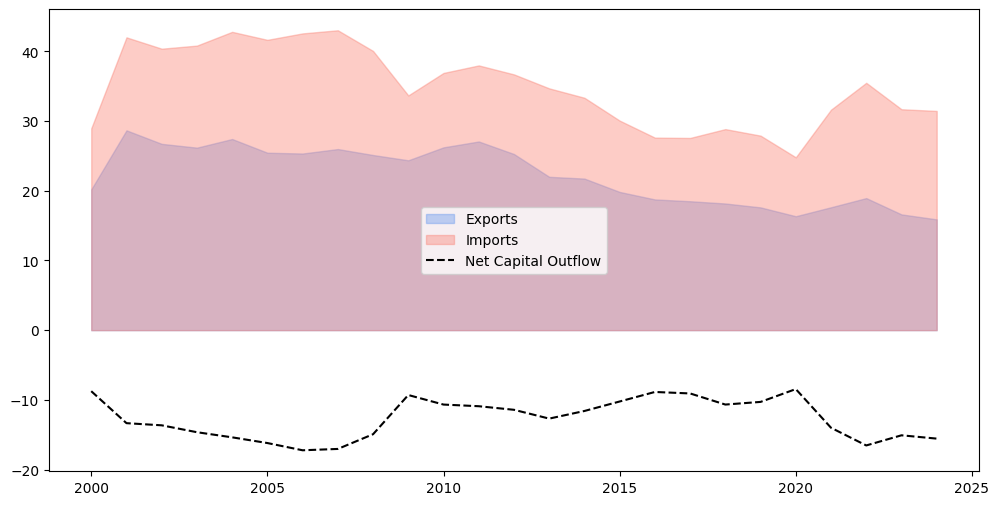

In [47]:
plt.figure(figsize=(12, 6))
plt.fill_between(df_gtm.index, df_gtm['Exports_GDP'], color='cornflowerblue', alpha=0.4, label='Exports')
plt.fill_between(df_gtm.index, df_gtm['Imports_GDP'], color='salmon', alpha=0.4, label='Imports')
plt.plot(df_gtm.index, df_gtm['NCO'], color='black', linestyle='--', label='Net Capital Outflow')
plt.legend()
plt.show()

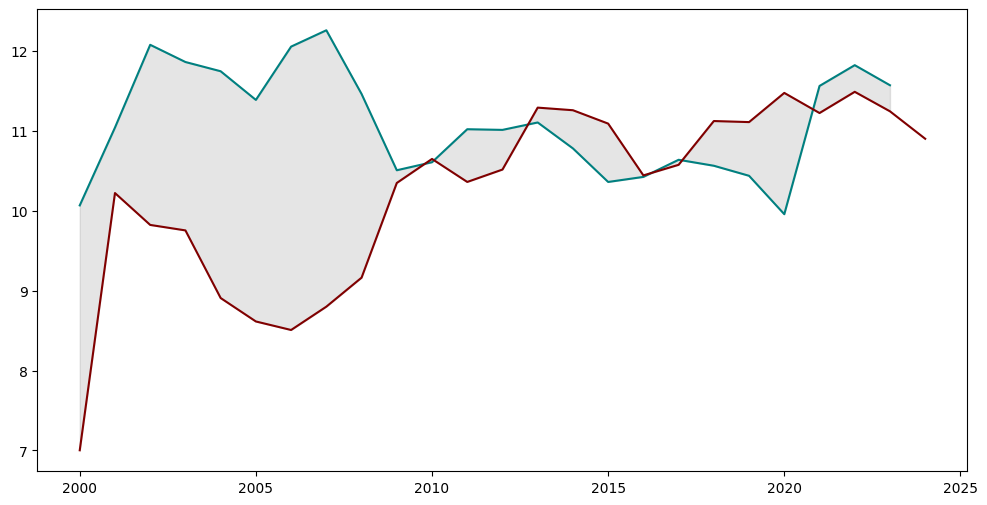

In [48]:
plt.figure(figsize=(12, 6))
plt.plot(df_gtm.index, df_gtm['Tax_Rev_GDP'], label='Revenue', color='teal')
plt.plot(df_gtm.index, df_gtm['Gov_Exp_GDP'], label='Expenditure', color='maroon')
plt.fill_between(df_gtm.index, df_gtm['Tax_Rev_GDP'], df_gtm['Gov_Exp_GDP'], color='gray', alpha=0.2)
plt.show()

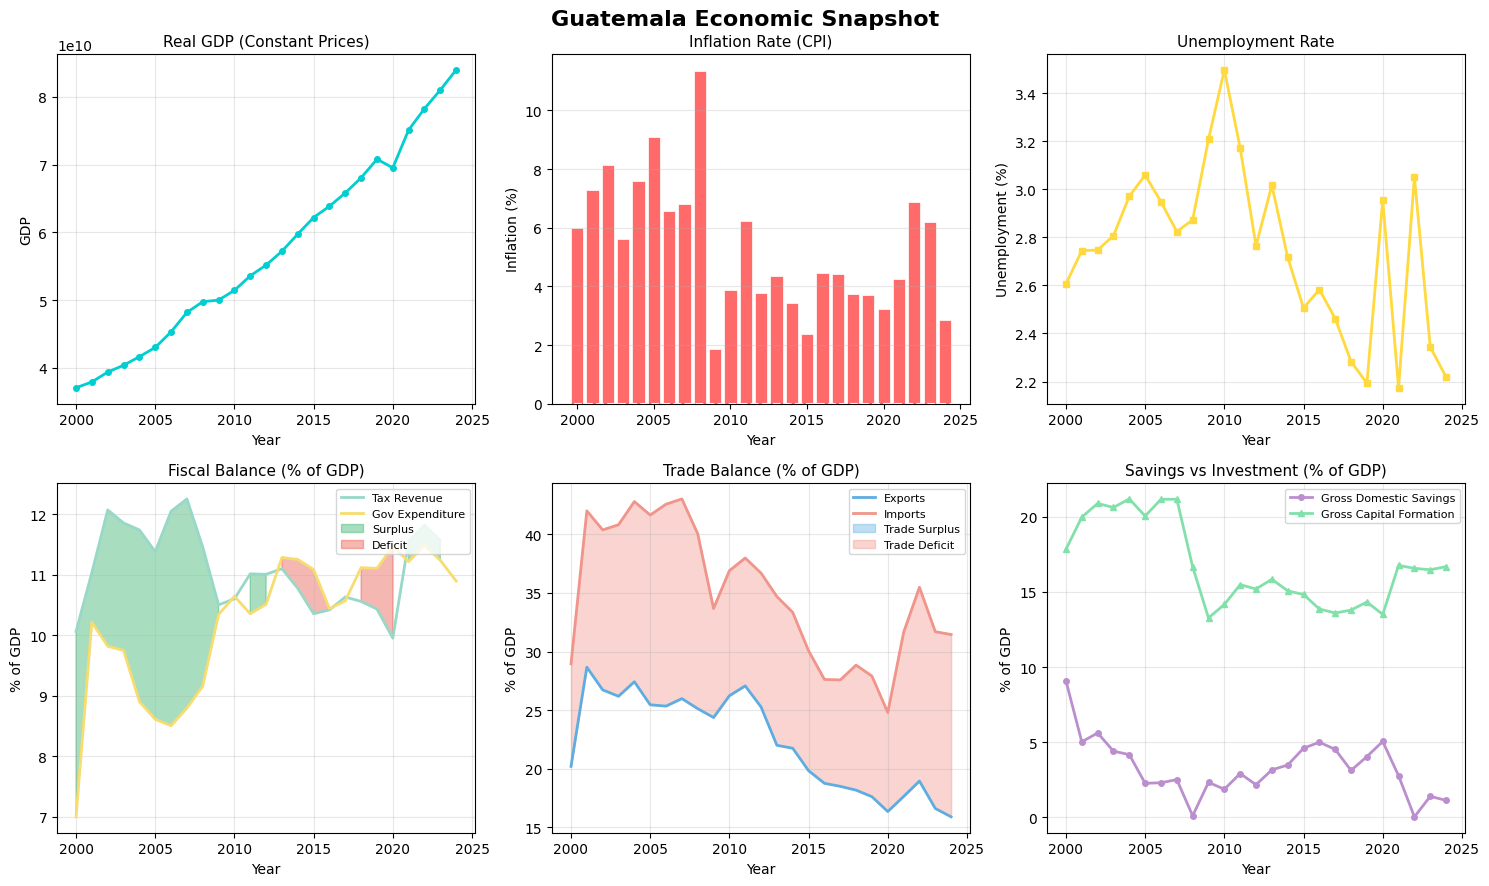

In [49]:
plt.style.use('fast')

fig, axes = plt.subplots(2, 3, figsize=(15, 9))
fig.suptitle('Guatemala Economic Snapshot', fontsize=16, fontweight='bold', y=0.98)

# Use index as x-axis (years are stored in index, not as a column)
years = df_gtm.index

# Top Left: Real GDP (Line)
ax1 = axes[0, 0]
ax1.plot(years, df_gtm['GDP_Const'], color='#00CED1', linewidth=2, marker='o', markersize=4)
ax1.set_title('Real GDP (Constant Prices)', fontsize=11)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.grid(alpha=0.3)

# Top Middle: Inflation Rate (Bar with zero line)
ax2 = axes[0, 1]
colors = ['#FF6B6B' if x > 0 else '#4ECDC4' for x in df_gtm['Inflation_CPI']]
ax2.bar(years, df_gtm['Inflation_CPI'], color=colors, edgecolor='white', linewidth=0.5)
ax2.axhline(y=0, color='white', linestyle='--', linewidth=1.5)
ax2.set_title('Inflation Rate (CPI)', fontsize=11)
ax2.set_xlabel('Year')
ax2.set_ylabel('Inflation (%)')
ax2.grid(alpha=0.3, axis='y')

# Top Right: Unemployment Rate (Line)
ax3 = axes[0, 2]
ax3.plot(years, df_gtm['Unemployment_Rate'], color='#FFD93D', linewidth=2, marker='s', markersize=4)
ax3.set_title('Unemployment Rate', fontsize=11)
ax3.set_xlabel('Year')
ax3.set_ylabel('Unemployment (%)')
ax3.grid(alpha=0.3)

# Bottom Left: Fiscal Balance (Fill between Tax Rev and Gov Exp)
ax4 = axes[1, 0]
ax4.plot(years, df_gtm['Tax_Rev_GDP'], label='Tax Revenue', color='#98D8C8', linewidth=2)
ax4.plot(years, df_gtm['Gov_Exp_GDP'], label='Gov Expenditure', color='#F7DC6F', linewidth=2)
ax4.fill_between(years, df_gtm['Tax_Rev_GDP'], df_gtm['Gov_Exp_GDP'],
                 where=(df_gtm['Tax_Rev_GDP'] >= df_gtm['Gov_Exp_GDP']),
                 color='#27AE60', alpha=0.4, label='Surplus')
ax4.fill_between(years, df_gtm['Tax_Rev_GDP'], df_gtm['Gov_Exp_GDP'],
                 where=(df_gtm['Tax_Rev_GDP'] < df_gtm['Gov_Exp_GDP']),
                 color='#E74C3C', alpha=0.4, label='Deficit')
ax4.set_title('Fiscal Balance (% of GDP)', fontsize=11)
ax4.set_xlabel('Year')
ax4.set_ylabel('% of GDP')
ax4.legend(loc='upper right', fontsize=8)
ax4.grid(alpha=0.3)

# Bottom Middle: Trade Balance (Fill between Exports and Imports)
ax5 = axes[1, 1]
ax5.plot(years, df_gtm['Exports_GDP'], label='Exports', color='#5DADE2', linewidth=2)
ax5.plot(years, df_gtm['Imports_GDP'], label='Imports', color='#F1948A', linewidth=2)
ax5.fill_between(years, df_gtm['Exports_GDP'], df_gtm['Imports_GDP'],
                 where=(df_gtm['Exports_GDP'] >= df_gtm['Imports_GDP']),
                 color='#5DADE2', alpha=0.4, label='Trade Surplus')
ax5.fill_between(years, df_gtm['Exports_GDP'], df_gtm['Imports_GDP'],
                 where=(df_gtm['Exports_GDP'] < df_gtm['Imports_GDP']),
                 color='#F1948A', alpha=0.4, label='Trade Deficit')
ax5.set_title('Trade Balance (% of GDP)', fontsize=11)
ax5.set_xlabel('Year')
ax5.set_ylabel('% of GDP')
ax5.legend(loc='upper right', fontsize=8)
ax5.grid(alpha=0.3)

# Bottom Right: Savings vs Investment (Dual lines)
ax6 = axes[1, 2]
ax6.plot(years, df_gtm['Gross_Dom_Savings'], label='Gross Domestic Savings',
         color='#BB8FCE', linewidth=2, marker='o', markersize=4)
ax6.plot(years, df_gtm['Gross_Cap_Formation'], label='Gross Capital Formation',
         color='#82E0AA', linewidth=2, marker='^', markersize=4)
ax6.set_title('Savings vs Investment (% of GDP)', fontsize=11)
ax6.set_xlabel('Year')
ax6.set_ylabel('% of GDP')
ax6.legend(loc='best', fontsize=8)
ax6.grid(alpha=0.3)

plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()